In [3]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC","PCCW", "PACC", "HDy", "EMQ", "MLPE"]
#quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ", "MLPE"]
error = "MAE"
mixture_points = np.linspace(0, 1, 3)[::-1]
p_train = 0.7
ps_test = [p_train, 0.5, 0.25]
dateexperiment = "2022_06_28_06_34"

mean_error_methods = {}

writer = pd.ExcelWriter('results/covariate/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for i, p_test in enumerate(ps_test):
    for quant_name in quantificators:
        exp_id = "%s_%f" % (quant_name,p_test)
        results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
        results = results.loc[results['p_test'] == p_test]
        results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
        #convert to matrix form
        results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
        mean_error_methods[exp_id]=results_mean.mean().mean()
        print("Results for method %s. p_test: %f. Mean %s: %f" % (quant_name,p_test,error,mean_error_methods[exp_id]))
        cm = sns.light_palette('red', as_cmap=True)
        display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))
        results_mean.to_excel(writer, sheet_name=exp_id)
        workbook = writer.book
        worksheet = writer.sheets[exp_id]
        # Apply a conditional format to the cell range.
        worksheet.conditional_format('B2:L12', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.save()


Results for method CC. p_test: 0.700000. Mean MAE: 0.027178


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020200,0.026464,0.035656,0.044016,0.056572,0.066384,0.069032,0.080324,0.095224,0.101868,0.112004
0.100000,0.017176,0.018608,0.022204,0.023204,0.026160,0.028200,0.027212,0.030360,0.036184,0.036932,0.039136
0.200000,0.020624,0.021512,0.023776,0.025336,0.027096,0.028800,0.026916,0.029496,0.033820,0.033960,0.035956
0.300000,0.015816,0.016624,0.017296,0.018580,0.017996,0.019052,0.017128,0.018808,0.020152,0.021660,0.021716
0.400000,0.016876,0.017664,0.018964,0.018968,0.019724,0.020216,0.019804,0.021484,0.022624,0.025940,0.026000
0.500000,0.021852,0.023532,0.024248,0.025972,0.025440,0.025472,0.023500,0.026188,0.026856,0.029520,0.030128
0.600000,0.017640,0.018456,0.018928,0.019808,0.018292,0.018836,0.016472,0.020080,0.018144,0.021340,0.020004
0.700000,0.016580,0.016636,0.016484,0.017792,0.017068,0.016796,0.016032,0.018912,0.017360,0.020032,0.019192
0.800000,0.021488,0.021900,0.021600,0.022548,0.020512,0.021240,0.018908,0.021020,0.019604,0.022624,0.021000


Results for method ACC. p_test: 0.700000. Mean MAE: 0.030266


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020591,0.027024,0.041104,0.053146,0.070440,0.083548,0.087091,0.102704,0.124889,0.133899,0.148017
0.100000,0.018993,0.020315,0.024225,0.023957,0.026151,0.028441,0.025847,0.031177,0.036620,0.039312,0.041086
0.200000,0.020494,0.020983,0.022748,0.024504,0.025543,0.026073,0.024109,0.028248,0.033980,0.033141,0.035324
0.300000,0.021284,0.020078,0.020827,0.022667,0.022430,0.022923,0.021799,0.024004,0.025990,0.027862,0.029976
0.400000,0.020532,0.020151,0.019896,0.019759,0.020166,0.019600,0.020082,0.021236,0.022972,0.024965,0.025124
0.500000,0.021284,0.021953,0.022594,0.022291,0.021605,0.020700,0.019391,0.024393,0.023686,0.026081,0.026229
0.600000,0.021005,0.019693,0.019829,0.019508,0.018982,0.018015,0.018189,0.021335,0.018383,0.019553,0.018112
0.700000,0.020589,0.019962,0.018278,0.018125,0.019167,0.017688,0.018358,0.021080,0.018725,0.021369,0.021466
0.800000,0.023444,0.021531,0.019829,0.018499,0.018511,0.019057,0.018021,0.019686,0.017942,0.020045,0.018656


Results for method PCC. p_test: 0.700000. Mean MAE: 0.017143


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.015528,0.019629,0.026264,0.031369,0.038898,0.046083,0.047129,0.055770,0.065222,0.070722,0.076694
0.100000,0.012293,0.013227,0.015165,0.014959,0.016198,0.016554,0.015741,0.017852,0.021506,0.021340,0.021775
0.200000,0.011005,0.011266,0.012047,0.011733,0.012374,0.011462,0.010390,0.012239,0.013643,0.012845,0.012366
0.300000,0.011924,0.012018,0.012175,0.011466,0.011981,0.010747,0.011084,0.011714,0.011624,0.012243,0.010627
0.400000,0.010849,0.011084,0.011752,0.010965,0.011690,0.011114,0.010872,0.011255,0.013075,0.013702,0.013197
0.500000,0.010161,0.010661,0.010943,0.010369,0.010802,0.009988,0.009591,0.010748,0.010757,0.011417,0.010293
0.600000,0.010998,0.011001,0.010918,0.011053,0.010492,0.010168,0.009476,0.011310,0.010944,0.011035,0.010333
0.700000,0.016997,0.016388,0.016539,0.016295,0.015668,0.015463,0.014638,0.015642,0.015682,0.016037,0.016098
0.800000,0.011835,0.011449,0.011174,0.010764,0.010793,0.010210,0.009069,0.010525,0.010328,0.010848,0.010643


Results for method PCCW. p_test: 0.700000. Mean MAE: 0.026957


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.014735,0.018965,0.030891,0.043901,0.062494,0.080716,0.090325,0.114790,0.143390,0.163821,0.189283
0.100000,0.015515,0.014941,0.016028,0.017055,0.019866,0.019957,0.021243,0.027167,0.037025,0.038540,0.042531
0.200000,0.015897,0.014819,0.014768,0.015876,0.016685,0.013578,0.016047,0.018177,0.023424,0.022373,0.023021
0.300000,0.017302,0.016291,0.015791,0.016443,0.016209,0.012694,0.015874,0.016410,0.016826,0.016202,0.014199
0.400000,0.019346,0.017036,0.015497,0.015435,0.015277,0.011267,0.014713,0.014832,0.016658,0.016575,0.015881
0.500000,0.018373,0.016701,0.015596,0.015309,0.015537,0.010971,0.014028,0.014039,0.014466,0.013996,0.012476
0.600000,0.022571,0.019370,0.017862,0.017355,0.017678,0.013733,0.016669,0.015229,0.014211,0.012954,0.012104
0.700000,0.023360,0.019650,0.018462,0.017488,0.017759,0.013997,0.017636,0.016247,0.015023,0.014170,0.013948
0.800000,0.026821,0.022485,0.020189,0.018173,0.018561,0.014345,0.017547,0.015233,0.013900,0.012945,0.011661


Results for method PACC. p_test: 0.700000. Mean MAE: 0.024931


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.016337,0.022692,0.034026,0.043710,0.057173,0.070364,0.072937,0.089186,0.106444,0.116203,0.127882
0.100000,0.016639,0.018080,0.020274,0.019828,0.021194,0.020978,0.020337,0.024105,0.030092,0.030069,0.030739
0.200000,0.017687,0.017193,0.017353,0.017649,0.018041,0.015486,0.016365,0.018611,0.021743,0.019447,0.019289
0.300000,0.018156,0.017951,0.017404,0.017298,0.017430,0.014307,0.016987,0.017474,0.017791,0.017228,0.014802
0.400000,0.017656,0.017974,0.017450,0.017349,0.017525,0.014791,0.017467,0.017964,0.020207,0.019591,0.019169
0.500000,0.017647,0.017999,0.018197,0.017071,0.017775,0.014746,0.016351,0.017653,0.017848,0.017956,0.016724
0.600000,0.017588,0.017343,0.016484,0.016754,0.016728,0.014282,0.016951,0.016787,0.017468,0.016015,0.015846
0.700000,0.017968,0.017089,0.015967,0.015845,0.015902,0.013287,0.015393,0.016094,0.016600,0.015416,0.016144
0.800000,0.018806,0.017968,0.016935,0.016175,0.017101,0.014352,0.015979,0.016468,0.016160,0.016066,0.015461


Results for method HDy. p_test: 0.700000. Mean MAE: 0.045951


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.023147,0.031624,0.055620,0.076950,0.104574,0.130505,0.149119,0.180661,0.219859,0.247778,0.285099
0.100000,0.022360,0.022465,0.030077,0.042157,0.055479,0.067370,0.077289,0.096188,0.123220,0.136077,0.154719
0.200000,0.024073,0.020327,0.021394,0.024575,0.030000,0.032739,0.038125,0.048748,0.063919,0.071402,0.079725
0.300000,0.026242,0.021636,0.020610,0.020542,0.021503,0.022012,0.026562,0.033749,0.040776,0.045289,0.050255
0.400000,0.031814,0.026756,0.024517,0.022206,0.021038,0.018012,0.021669,0.024409,0.027143,0.030970,0.034048
0.500000,0.034218,0.027564,0.026703,0.023438,0.021608,0.020800,0.022812,0.025861,0.027927,0.033632,0.035572
0.600000,0.035172,0.028719,0.027022,0.023429,0.022545,0.020230,0.021345,0.022913,0.020069,0.022323,0.022549
0.700000,0.045301,0.038949,0.034299,0.029963,0.025992,0.022578,0.023543,0.023257,0.020816,0.022473,0.022497
0.800000,0.055774,0.043673,0.037911,0.032188,0.028877,0.025099,0.025802,0.024161,0.019713,0.019689,0.018453


Results for method EMQ. p_test: 0.700000. Mean MAE: 0.029644


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.016296,0.023534,0.038371,0.051844,0.071776,0.091306,0.100423,0.125882,0.156733,0.177331,0.204196
0.100000,0.015668,0.016375,0.019586,0.020654,0.024316,0.025781,0.025984,0.033132,0.044180,0.046161,0.051174
0.200000,0.016038,0.016164,0.016717,0.017324,0.018108,0.015213,0.016481,0.018563,0.022861,0.020900,0.020826
0.300000,0.017326,0.016819,0.016727,0.016942,0.017265,0.013901,0.016252,0.017265,0.017927,0.017583,0.015257
0.400000,0.017565,0.016734,0.015902,0.015900,0.016117,0.013060,0.015544,0.016340,0.018982,0.019366,0.018848
0.500000,0.018278,0.017298,0.016590,0.016197,0.016368,0.012757,0.014493,0.015593,0.016658,0.016617,0.015302
0.600000,0.021795,0.019059,0.017766,0.017172,0.017451,0.013708,0.015897,0.015359,0.015271,0.014120,0.012816
0.700000,0.024253,0.020702,0.018390,0.017258,0.017776,0.013790,0.016349,0.015981,0.015560,0.014570,0.014152
0.800000,0.027520,0.023540,0.020858,0.018722,0.019138,0.015044,0.017047,0.015871,0.015035,0.014611,0.013287


Results for method MLPE. p_test: 0.700000. Mean MAE: 0.000188


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.000120,0.000120,0.000120,0.000507,0.000120,0.000120,0.000120,0.000648,0.000120,0.000120,0.000120
0.100000,0.000100,0.000100,0.000100,0.000496,0.000100,0.000100,0.000100,0.000640,0.000100,0.000100,0.000100
0.200000,0.000080,0.000080,0.000080,0.000485,0.000080,0.000080,0.000080,0.000632,0.000080,0.000080,0.000080
0.300000,0.000060,0.000060,0.000060,0.000474,0.000060,0.000060,0.000060,0.000624,0.000060,0.000060,0.000060
0.400000,0.000160,0.000160,0.000160,0.000530,0.000160,0.000160,0.000160,0.000664,0.000160,0.000160,0.000160
0.500000,0.000180,0.000180,0.000180,0.000541,0.000180,0.000180,0.000180,0.000672,0.000180,0.000180,0.000180
0.600000,0.000140,0.000140,0.000140,0.000518,0.000140,0.000140,0.000140,0.000656,0.000140,0.000140,0.000140
0.700000,0.000140,0.000140,0.000140,0.000518,0.000140,0.000140,0.000140,0.000656,0.000140,0.000140,0.000140
0.800000,0.000080,0.000080,0.000080,0.000485,0.000080,0.000080,0.000080,0.000632,0.000080,0.000080,0.000080


Results for method CC. p_test: 0.500000. Mean MAE: 0.054929


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.043724,0.039812,0.036920,0.036064,0.037324,0.038916,0.042616,0.044176,0.048576,0.051028,0.056144
0.100000,0.045892,0.044196,0.046028,0.044648,0.044196,0.043296,0.047084,0.044880,0.043088,0.043464,0.041452
0.200000,0.045408,0.043724,0.046128,0.043724,0.044424,0.043456,0.047968,0.046600,0.045908,0.044528,0.045300
0.300000,0.048780,0.047628,0.048768,0.047992,0.049116,0.047728,0.052536,0.051376,0.050036,0.046876,0.046064
0.400000,0.050000,0.048324,0.048720,0.046300,0.044724,0.044708,0.047692,0.045296,0.043412,0.039240,0.038604
0.500000,0.046448,0.044484,0.045280,0.041356,0.040852,0.039616,0.042036,0.039448,0.038564,0.033744,0.030640
0.600000,0.057144,0.053504,0.055412,0.050976,0.050048,0.048760,0.051924,0.048316,0.048340,0.041828,0.040740
0.700000,0.068260,0.064852,0.064660,0.059468,0.057824,0.055936,0.056352,0.052124,0.050124,0.043296,0.041428
0.800000,0.067480,0.062340,0.063084,0.057464,0.055400,0.052104,0.054516,0.049320,0.047316,0.039764,0.037752


Results for method ACC. p_test: 0.500000. Mean MAE: 0.033461


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.023190,0.026995,0.031755,0.040884,0.050666,0.058671,0.061984,0.074877,0.083654,0.090979,0.100455
0.100000,0.025160,0.025052,0.022923,0.022137,0.025522,0.024705,0.021901,0.025444,0.027719,0.028400,0.028208
0.200000,0.025106,0.025969,0.022784,0.024714,0.027005,0.025986,0.023769,0.027035,0.028271,0.028555,0.028441
0.300000,0.024984,0.024995,0.022783,0.023922,0.025683,0.026061,0.022867,0.025720,0.026137,0.027976,0.030347
0.400000,0.022508,0.022773,0.019454,0.020488,0.022946,0.021954,0.020408,0.023187,0.023151,0.026776,0.026855
0.500000,0.023428,0.025505,0.022061,0.022869,0.025402,0.025389,0.021852,0.027358,0.026079,0.030805,0.031959
0.600000,0.024584,0.021694,0.020720,0.021195,0.022420,0.021435,0.019707,0.022707,0.019511,0.022818,0.021349
0.700000,0.028420,0.023700,0.022060,0.020270,0.021740,0.020715,0.019146,0.023017,0.020799,0.026489,0.028337
0.800000,0.034604,0.028135,0.027976,0.022307,0.023669,0.022089,0.019936,0.021707,0.018862,0.025172,0.024274


Results for method PCC. p_test: 0.500000. Mean MAE: 0.082874


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.069436,0.067616,0.065601,0.061646,0.059225,0.055902,0.056581,0.052897,0.051762,0.050364,0.050388
0.100000,0.073650,0.074028,0.075714,0.075141,0.075976,0.076356,0.080008,0.079232,0.078155,0.078930,0.079613
0.200000,0.069449,0.069353,0.071945,0.070620,0.072436,0.072496,0.077311,0.075435,0.075952,0.075494,0.077824
0.300000,0.075987,0.076012,0.076846,0.077039,0.077908,0.078499,0.082194,0.081555,0.081444,0.080177,0.081330
0.400000,0.073804,0.073276,0.072898,0.070850,0.070965,0.069621,0.072663,0.070796,0.069742,0.065963,0.066895
0.500000,0.095154,0.093411,0.093099,0.090127,0.089985,0.088299,0.090234,0.086857,0.086114,0.082148,0.082374
0.600000,0.089138,0.086503,0.086600,0.082573,0.082311,0.080693,0.082207,0.078643,0.077000,0.073505,0.073578
0.700000,0.095954,0.092375,0.091070,0.087033,0.085657,0.082725,0.083855,0.079706,0.076790,0.072459,0.071386
0.800000,0.100091,0.095563,0.094814,0.089494,0.087627,0.083757,0.085036,0.079976,0.076609,0.071287,0.069453


Results for method PCCW. p_test: 0.500000. Mean MAE: 0.031525


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.019442,0.015432,0.017715,0.028602,0.041403,0.055414,0.066376,0.088550,0.107868,0.128012,0.151147
0.100000,0.022559,0.019130,0.017967,0.017474,0.017885,0.016810,0.017810,0.020212,0.024456,0.027129,0.028728
0.200000,0.021986,0.018801,0.018751,0.019224,0.018571,0.017429,0.019090,0.018127,0.017955,0.018631,0.017415
0.300000,0.024141,0.022034,0.021864,0.021878,0.021812,0.021551,0.023218,0.022556,0.019996,0.020236,0.017925
0.400000,0.027469,0.024843,0.023767,0.021927,0.021408,0.020151,0.021478,0.020421,0.017883,0.017443,0.016805
0.500000,0.024484,0.021696,0.021247,0.020025,0.020493,0.018988,0.020253,0.019049,0.016648,0.015862,0.013576
0.600000,0.029544,0.025878,0.026535,0.024198,0.024602,0.024009,0.026392,0.024209,0.020867,0.019763,0.019494
0.700000,0.032562,0.028681,0.028911,0.026484,0.025894,0.025298,0.027948,0.025461,0.022758,0.021363,0.021244
0.800000,0.033982,0.029176,0.029526,0.025971,0.026053,0.023741,0.026272,0.023357,0.019454,0.017629,0.016786


Results for method PACC. p_test: 0.500000. Mean MAE: 0.029745


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020809,0.024216,0.026482,0.032976,0.039154,0.045466,0.046794,0.056149,0.062244,0.068352,0.074108
0.100000,0.023384,0.022953,0.020385,0.019939,0.022369,0.020473,0.018532,0.019629,0.021586,0.023165,0.020886
0.200000,0.022207,0.021957,0.017726,0.020499,0.021523,0.019302,0.017752,0.018555,0.018822,0.019223,0.016823
0.300000,0.022438,0.021769,0.019368,0.020680,0.022186,0.019723,0.018076,0.019750,0.018340,0.020103,0.017303
0.400000,0.020154,0.020912,0.019008,0.021469,0.023579,0.021674,0.020564,0.022579,0.024262,0.028101,0.027271
0.500000,0.018561,0.019882,0.016910,0.019042,0.021881,0.020287,0.019383,0.023599,0.023832,0.028673,0.027866
0.600000,0.020324,0.017994,0.016777,0.018288,0.020145,0.019061,0.018455,0.021762,0.021528,0.025329,0.024252
0.700000,0.026971,0.021538,0.018938,0.017560,0.018635,0.016492,0.015485,0.018823,0.019632,0.023442,0.025173
0.800000,0.038519,0.030544,0.028147,0.021915,0.022226,0.018859,0.017091,0.019994,0.019067,0.024926,0.026775


Results for method HDy. p_test: 0.500000. Mean MAE: 0.044125


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.023212,0.029475,0.044687,0.063293,0.083232,0.102909,0.118000,0.145515,0.170384,0.193717,0.223576
0.100000,0.023616,0.024929,0.030000,0.041657,0.053616,0.062808,0.070525,0.090283,0.107616,0.119515,0.138263
0.200000,0.021919,0.019818,0.020404,0.025556,0.030525,0.033778,0.037778,0.050808,0.060545,0.067899,0.078182
0.300000,0.024222,0.020081,0.018747,0.020101,0.023051,0.024747,0.026061,0.035172,0.040626,0.044747,0.051091
0.400000,0.033515,0.028485,0.024707,0.023152,0.022747,0.021636,0.021879,0.026162,0.028222,0.031495,0.034263
0.500000,0.035879,0.029010,0.026061,0.023293,0.023374,0.022768,0.021414,0.027636,0.028061,0.033475,0.038020
0.600000,0.035535,0.028727,0.026525,0.024101,0.022909,0.022505,0.021232,0.024101,0.021758,0.023354,0.024687
0.700000,0.046020,0.039354,0.033879,0.030444,0.026828,0.026101,0.022061,0.024182,0.022000,0.024323,0.024990
0.800000,0.058566,0.045960,0.041172,0.036303,0.031939,0.028828,0.026485,0.025576,0.020970,0.020788,0.020242


Results for method EMQ. p_test: 0.500000. Mean MAE: 0.030839


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.018809,0.025029,0.036208,0.051558,0.067169,0.082872,0.094260,0.117278,0.136635,0.156304,0.178831
0.100000,0.018245,0.018012,0.018376,0.022357,0.026128,0.027967,0.028442,0.036378,0.043433,0.046431,0.051705
0.200000,0.018265,0.017163,0.015477,0.019188,0.020161,0.019143,0.018651,0.020694,0.022193,0.023086,0.021609
0.300000,0.019042,0.017372,0.016523,0.018895,0.019824,0.017735,0.017158,0.019003,0.017838,0.018687,0.016119
0.400000,0.018292,0.016877,0.015710,0.017575,0.018328,0.016572,0.016625,0.018618,0.018358,0.020502,0.019568
0.500000,0.018964,0.017960,0.015465,0.017972,0.018052,0.016007,0.015528,0.018370,0.016127,0.017711,0.016075
0.600000,0.020658,0.018177,0.016827,0.018283,0.018014,0.016350,0.015998,0.017604,0.014933,0.015327,0.013170
0.700000,0.020457,0.017678,0.016363,0.016860,0.017633,0.015751,0.015930,0.017740,0.015678,0.016080,0.014651
0.800000,0.024852,0.021553,0.019757,0.018818,0.018797,0.017638,0.016190,0.018843,0.014911,0.017194,0.014984


Results for method MLPE. p_test: 0.500000. Mean MAE: 0.199896


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880,0.199880
0.100000,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900,0.199900
0.200000,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920
0.300000,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940,0.199940
0.400000,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840,0.199840
0.500000,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820,0.199820
0.600000,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860
0.700000,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860,0.199860
0.800000,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920,0.199920


Results for method CC. p_test: 0.250000. Mean MAE: 0.137327


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.118236,0.118756,0.115816,0.116140,0.114920,0.116392,0.116788,0.111868,0.110804,0.108280,0.111860
0.100000,0.118840,0.121776,0.120464,0.124456,0.126452,0.130572,0.132808,0.130348,0.130936,0.130336,0.135884
0.200000,0.120960,0.122356,0.121020,0.124316,0.125080,0.129012,0.129924,0.127888,0.128376,0.127500,0.132456
0.300000,0.124324,0.125800,0.123516,0.127444,0.127636,0.129636,0.130808,0.127348,0.127616,0.124956,0.129304
0.400000,0.129348,0.127376,0.123532,0.126936,0.124208,0.125348,0.124332,0.120004,0.117696,0.113768,0.116408
0.500000,0.129412,0.126588,0.123524,0.124776,0.120428,0.121008,0.119232,0.114728,0.112368,0.107056,0.107936
0.600000,0.140516,0.137232,0.133404,0.133240,0.130272,0.129536,0.127480,0.120948,0.119564,0.113208,0.113716
0.700000,0.159768,0.153280,0.148616,0.146304,0.141752,0.138952,0.134576,0.126780,0.123020,0.114940,0.113940
0.800000,0.165420,0.158820,0.152532,0.148316,0.142404,0.139096,0.134440,0.124836,0.120080,0.111236,0.108508


Results for method ACC. p_test: 0.250000. Mean MAE: 0.040773


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.024151,0.024080,0.027057,0.028143,0.035425,0.038811,0.042264,0.048553,0.055183,0.062181,0.066592
0.100000,0.030420,0.025706,0.026836,0.023240,0.024274,0.021515,0.021842,0.023059,0.026545,0.025830,0.025075
0.200000,0.031625,0.026909,0.029277,0.025545,0.027655,0.023333,0.023329,0.026566,0.028196,0.026548,0.024825
0.300000,0.031170,0.027381,0.029767,0.026224,0.028201,0.026747,0.024880,0.028395,0.031193,0.032193,0.029040
0.400000,0.024821,0.023930,0.024831,0.021663,0.024447,0.024424,0.022181,0.025853,0.027741,0.032193,0.029354
0.500000,0.027420,0.026622,0.028037,0.026107,0.029490,0.026993,0.025752,0.032711,0.034538,0.040286,0.037723
0.600000,0.030421,0.025623,0.025190,0.023240,0.024086,0.023110,0.022205,0.024900,0.025118,0.029911,0.028440
0.700000,0.042505,0.033548,0.029204,0.025591,0.024617,0.023043,0.020938,0.025861,0.027706,0.035367,0.035719
0.800000,0.058962,0.049862,0.041768,0.035324,0.030566,0.025669,0.022301,0.024369,0.025442,0.032467,0.034179


Results for method PCC. p_test: 0.250000. Mean MAE: 0.195208


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.173066,0.176960,0.177331,0.178757,0.182383,0.185535,0.187752,0.186154,0.187942,0.189275,0.194295
0.100000,0.175746,0.180513,0.181905,0.184024,0.188914,0.193651,0.196754,0.196208,0.197967,0.200493,0.206358
0.200000,0.164761,0.167639,0.168675,0.170674,0.174295,0.178293,0.181178,0.178947,0.181284,0.181991,0.188365
0.300000,0.175324,0.177530,0.178058,0.179193,0.181218,0.184458,0.186008,0.183256,0.184509,0.184682,0.188853
0.400000,0.174296,0.173475,0.171944,0.171409,0.171184,0.171901,0.171193,0.166872,0.166000,0.162361,0.165736
0.500000,0.216159,0.213686,0.210926,0.209156,0.207205,0.206640,0.204764,0.199589,0.196814,0.192975,0.194076
0.600000,0.204070,0.200748,0.197697,0.193659,0.191953,0.190765,0.187949,0.181376,0.177964,0.173617,0.173838
0.700000,0.221725,0.216149,0.211208,0.206818,0.202594,0.199462,0.194825,0.186871,0.181646,0.175296,0.173708
0.800000,0.228102,0.221312,0.214950,0.208619,0.202917,0.198873,0.193106,0.183283,0.176667,0.169542,0.165822


Results for method PCCW. p_test: 0.250000. Mean MAE: 0.033384


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.022131,0.018798,0.018345,0.020420,0.025171,0.033695,0.042127,0.058240,0.070147,0.088717,0.101014
0.100000,0.024536,0.024915,0.020493,0.018918,0.019565,0.019434,0.018605,0.019601,0.022578,0.024832,0.025331
0.200000,0.023649,0.023421,0.020469,0.020193,0.021270,0.021758,0.022374,0.020310,0.020484,0.020335,0.022400
0.300000,0.024912,0.026125,0.022425,0.023298,0.024997,0.026722,0.026705,0.024834,0.023801,0.021272,0.025771
0.400000,0.029759,0.028771,0.024976,0.025667,0.025834,0.026788,0.025638,0.023877,0.022268,0.019491,0.023463
0.500000,0.025143,0.025276,0.021556,0.022606,0.022442,0.023326,0.023229,0.022109,0.019555,0.016902,0.020830
0.600000,0.028226,0.028252,0.024725,0.026105,0.026713,0.028089,0.028652,0.026582,0.024410,0.020525,0.026837
0.700000,0.031289,0.031354,0.026491,0.027717,0.029146,0.029871,0.029986,0.028179,0.026137,0.022547,0.028155
0.800000,0.032193,0.031787,0.026853,0.027583,0.027874,0.028014,0.027260,0.024923,0.021399,0.018296,0.022187


Results for method PACC. p_test: 0.250000. Mean MAE: 0.042460


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.026655,0.024270,0.024693,0.023013,0.027183,0.029150,0.031858,0.036540,0.041737,0.044689,0.049919
0.100000,0.034820,0.029141,0.026744,0.023927,0.022597,0.020956,0.021609,0.022626,0.025957,0.026751,0.031633
0.200000,0.034756,0.031139,0.029267,0.026307,0.024751,0.020282,0.017980,0.021125,0.020482,0.019788,0.018854
0.300000,0.032942,0.031063,0.030371,0.027824,0.027793,0.024440,0.021494,0.025913,0.025780,0.024621,0.020220
0.400000,0.025395,0.027786,0.029694,0.029919,0.031710,0.030060,0.030484,0.038211,0.041665,0.047082,0.041321
0.500000,0.019782,0.021393,0.023282,0.024727,0.027280,0.026642,0.028400,0.038209,0.042644,0.048956,0.045770
0.600000,0.023912,0.021804,0.021476,0.020809,0.023222,0.022536,0.024732,0.032913,0.038053,0.044835,0.043894
0.700000,0.045551,0.036421,0.028792,0.022556,0.020386,0.017147,0.017632,0.025623,0.032019,0.040947,0.043087
0.800000,0.077423,0.063427,0.051967,0.039611,0.031442,0.024192,0.019431,0.024478,0.030617,0.040971,0.046745


Results for method HDy. p_test: 0.250000. Mean MAE: 0.040039


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020697,0.022339,0.032889,0.038503,0.047576,0.059269,0.069141,0.083870,0.096758,0.115080,0.127232
0.100000,0.023717,0.025304,0.032768,0.036719,0.044323,0.049238,0.055747,0.069092,0.078434,0.094093,0.097646
0.200000,0.018970,0.018552,0.022859,0.022428,0.025717,0.029376,0.032960,0.042313,0.048232,0.058778,0.059788
0.300000,0.021505,0.018953,0.020444,0.018581,0.019929,0.023259,0.025343,0.032442,0.037333,0.042824,0.043253
0.400000,0.033929,0.028531,0.027636,0.022453,0.021283,0.022252,0.022212,0.024626,0.027717,0.032628,0.032162
0.500000,0.040465,0.032030,0.030222,0.025241,0.022949,0.022858,0.021182,0.027028,0.030040,0.037560,0.039596
0.600000,0.037061,0.032113,0.029838,0.025058,0.022162,0.023423,0.020232,0.023032,0.023283,0.025136,0.027576
0.700000,0.052364,0.045051,0.040737,0.034484,0.028869,0.026135,0.022232,0.023919,0.024626,0.028392,0.028929
0.800000,0.060838,0.050276,0.045455,0.038883,0.030374,0.027783,0.024646,0.023610,0.021515,0.023133,0.023434


Results for method EMQ. p_test: 0.250000. Mean MAE: 0.029468


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.019176,0.023846,0.034044,0.042261,0.048556,0.058224,0.069113,0.084219,0.094624,0.110916,0.121277
0.100000,0.018671,0.018791,0.023174,0.023603,0.023170,0.025251,0.026552,0.033998,0.038007,0.044034,0.041334
0.200000,0.020600,0.019275,0.022348,0.021065,0.020023,0.018886,0.017820,0.022108,0.022593,0.024893,0.019125
0.300000,0.020866,0.019707,0.022798,0.020365,0.018783,0.018320,0.016833,0.019406,0.020155,0.019843,0.016437
0.400000,0.018758,0.018640,0.020805,0.017785,0.016917,0.016965,0.016600,0.019246,0.019931,0.021973,0.017448
0.500000,0.019193,0.018842,0.021456,0.019385,0.017240,0.016665,0.016259,0.018324,0.019136,0.019724,0.014824
0.600000,0.019753,0.019041,0.020463,0.018460,0.016267,0.015620,0.015333,0.016970,0.017221,0.016862,0.013681
0.700000,0.017660,0.017888,0.018957,0.016196,0.015016,0.015130,0.015145,0.017374,0.017451,0.018482,0.015442
0.800000,0.022342,0.022179,0.022474,0.020152,0.018467,0.017280,0.016971,0.019851,0.019097,0.020260,0.016484


Results for method MLPE. p_test: 0.250000. Mean MAE: 0.450398


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.449880,0.450960,0.449880,0.451040,0.449880,0.450960,0.449880,0.450920,0.449880,0.451040,0.449880
0.100000,0.449900,0.450980,0.449900,0.451060,0.449900,0.450980,0.449900,0.450940,0.449900,0.451060,0.449900
0.200000,0.449920,0.451000,0.449920,0.451080,0.449920,0.451000,0.449920,0.450960,0.449920,0.451080,0.449920
0.300000,0.449940,0.451020,0.449940,0.451100,0.449940,0.451020,0.449940,0.450980,0.449940,0.451100,0.449940
0.400000,0.449840,0.450920,0.449840,0.451000,0.449840,0.450920,0.449840,0.450880,0.449840,0.451000,0.449840
0.500000,0.449820,0.450900,0.449820,0.450980,0.449820,0.450900,0.449820,0.450860,0.449820,0.450980,0.449820
0.600000,0.449860,0.450940,0.449860,0.451020,0.449860,0.450940,0.449860,0.450900,0.449860,0.451020,0.449860
0.700000,0.449860,0.450940,0.449860,0.451020,0.449860,0.450940,0.449860,0.450900,0.449860,0.451020,0.449860
0.800000,0.449920,0.451000,0.449920,0.451080,0.449920,0.451000,0.449920,0.450960,0.449920,0.451080,0.449920


Text(0.5, 0.38, 'p_train = 0.700000, p_test = 0.250000')

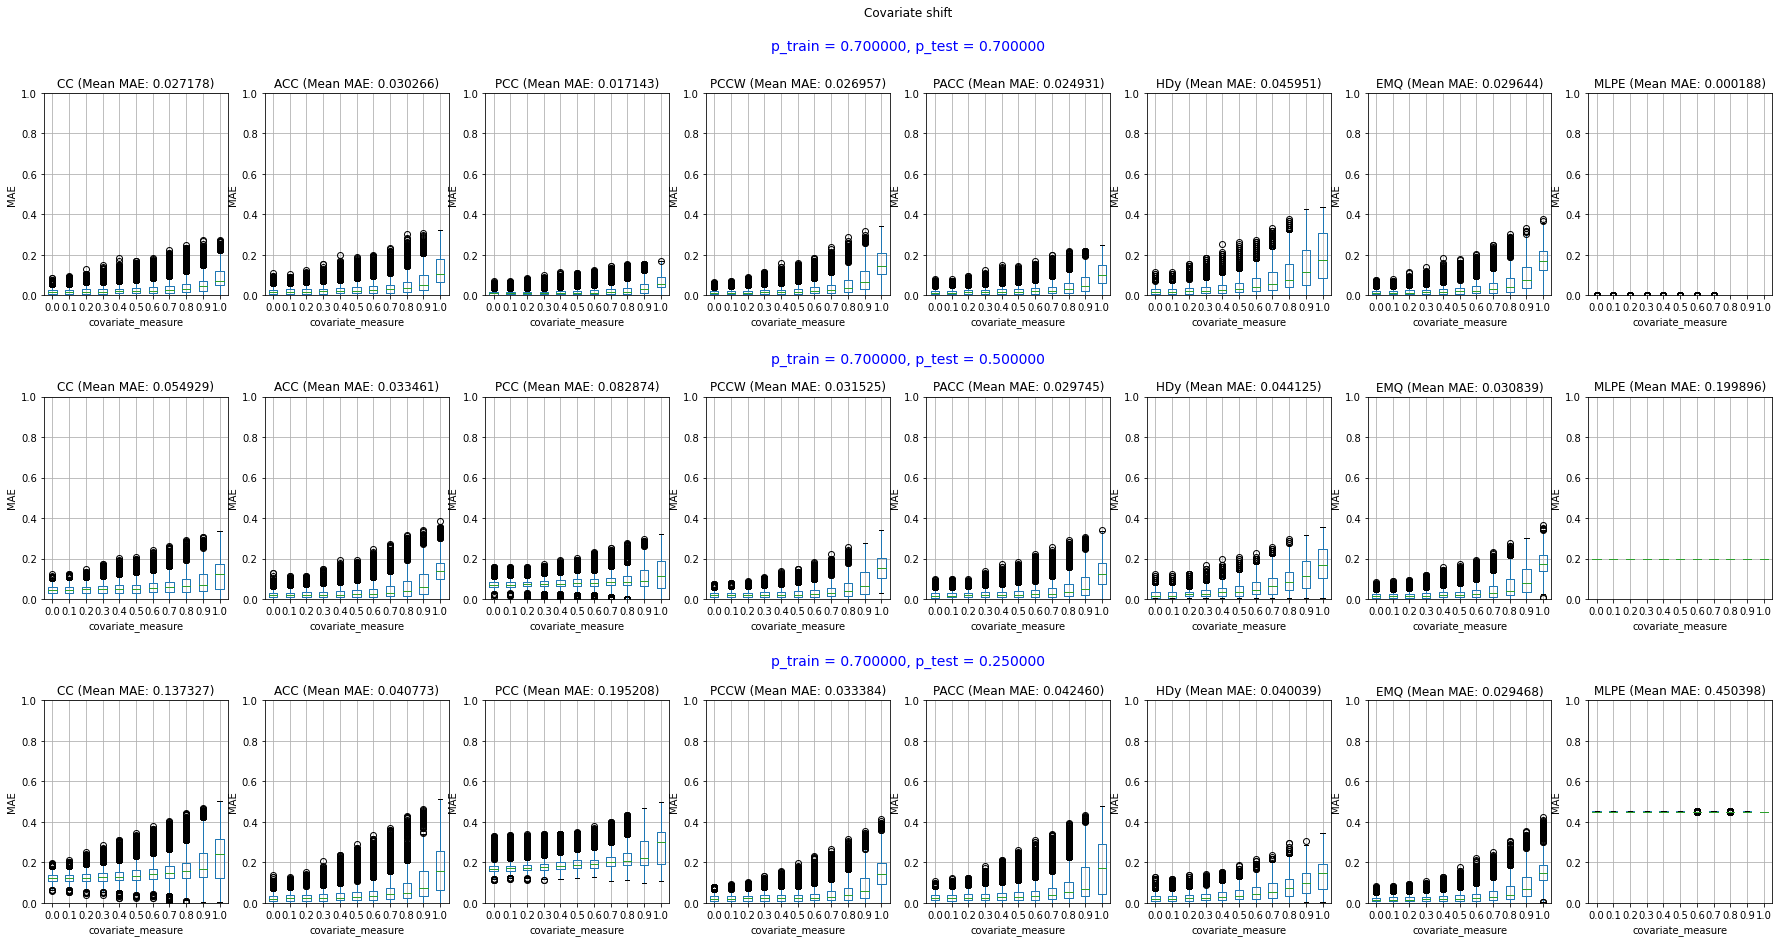

In [4]:
fig, ax = plt.subplots(len(ps_test),len(quantificators),figsize=(30,15))
plt.subplots_adjust(hspace=0.5)
for i, p_test in enumerate(ps_test):
    for k,quant_name in enumerate(quantificators):
        exp_id = "%s_%f" % (quant_name,p_test)
        results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
        results = results.loc[results['p_test'] == p_test]
        results['covariate_measure'] = abs(results['domainA_prop_train']-results['domainA_prop_test'])
        results['covariate_measure'] = results['covariate_measure'].round(1)
        ax[i][k].set_ylim(0, 1)
        ax[i][k].set_ylabel(error)
        results.boxplot(ax=ax[i][k],column='error',by='covariate_measure')
        plt.suptitle('Covariate shift')
        ax[i][k].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))

#Done by hand but I did not find an easy way
plt.figtext(0.5,0.95, "p_train = %f, p_test = %f" % (p_train,ps_test[0]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.66, "p_train = %f, p_test = %f" % (p_train,ps_test[1]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.38, "p_train = %f, p_test = %f" % (p_train,ps_test[2]), ha="center", va="top", fontsize=14, color="b")